# IQR method (Inter Quantile Range) (Q3 - Q1)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the data
dataset = pd.read_excel("Financial Sample.xlsx")
dataset.head(3)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,NaN,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,NaN,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,NaN,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014


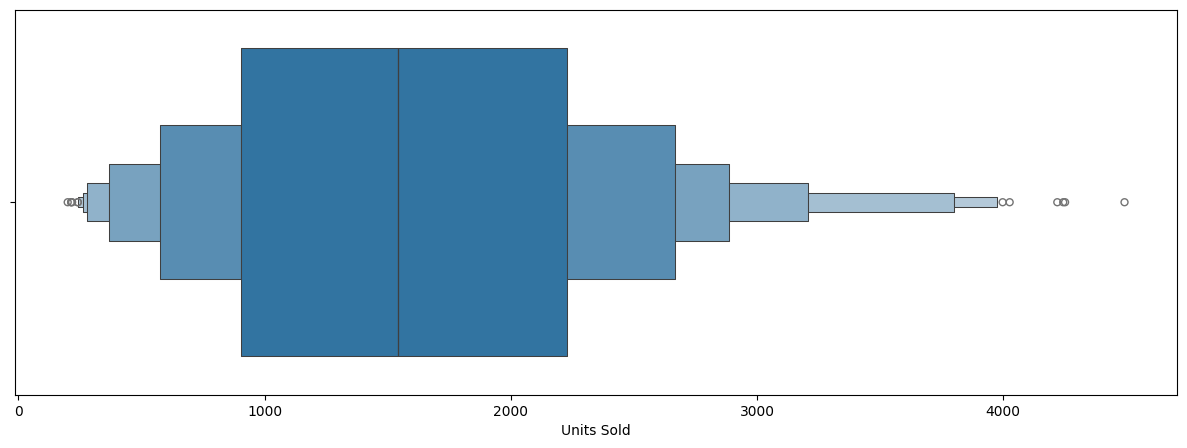

In [18]:
# using boxplot to determine the outlier

plt.figure(figsize=(15,5))
sns.boxenplot(x = "Units Sold", data=dataset)
plt.show()

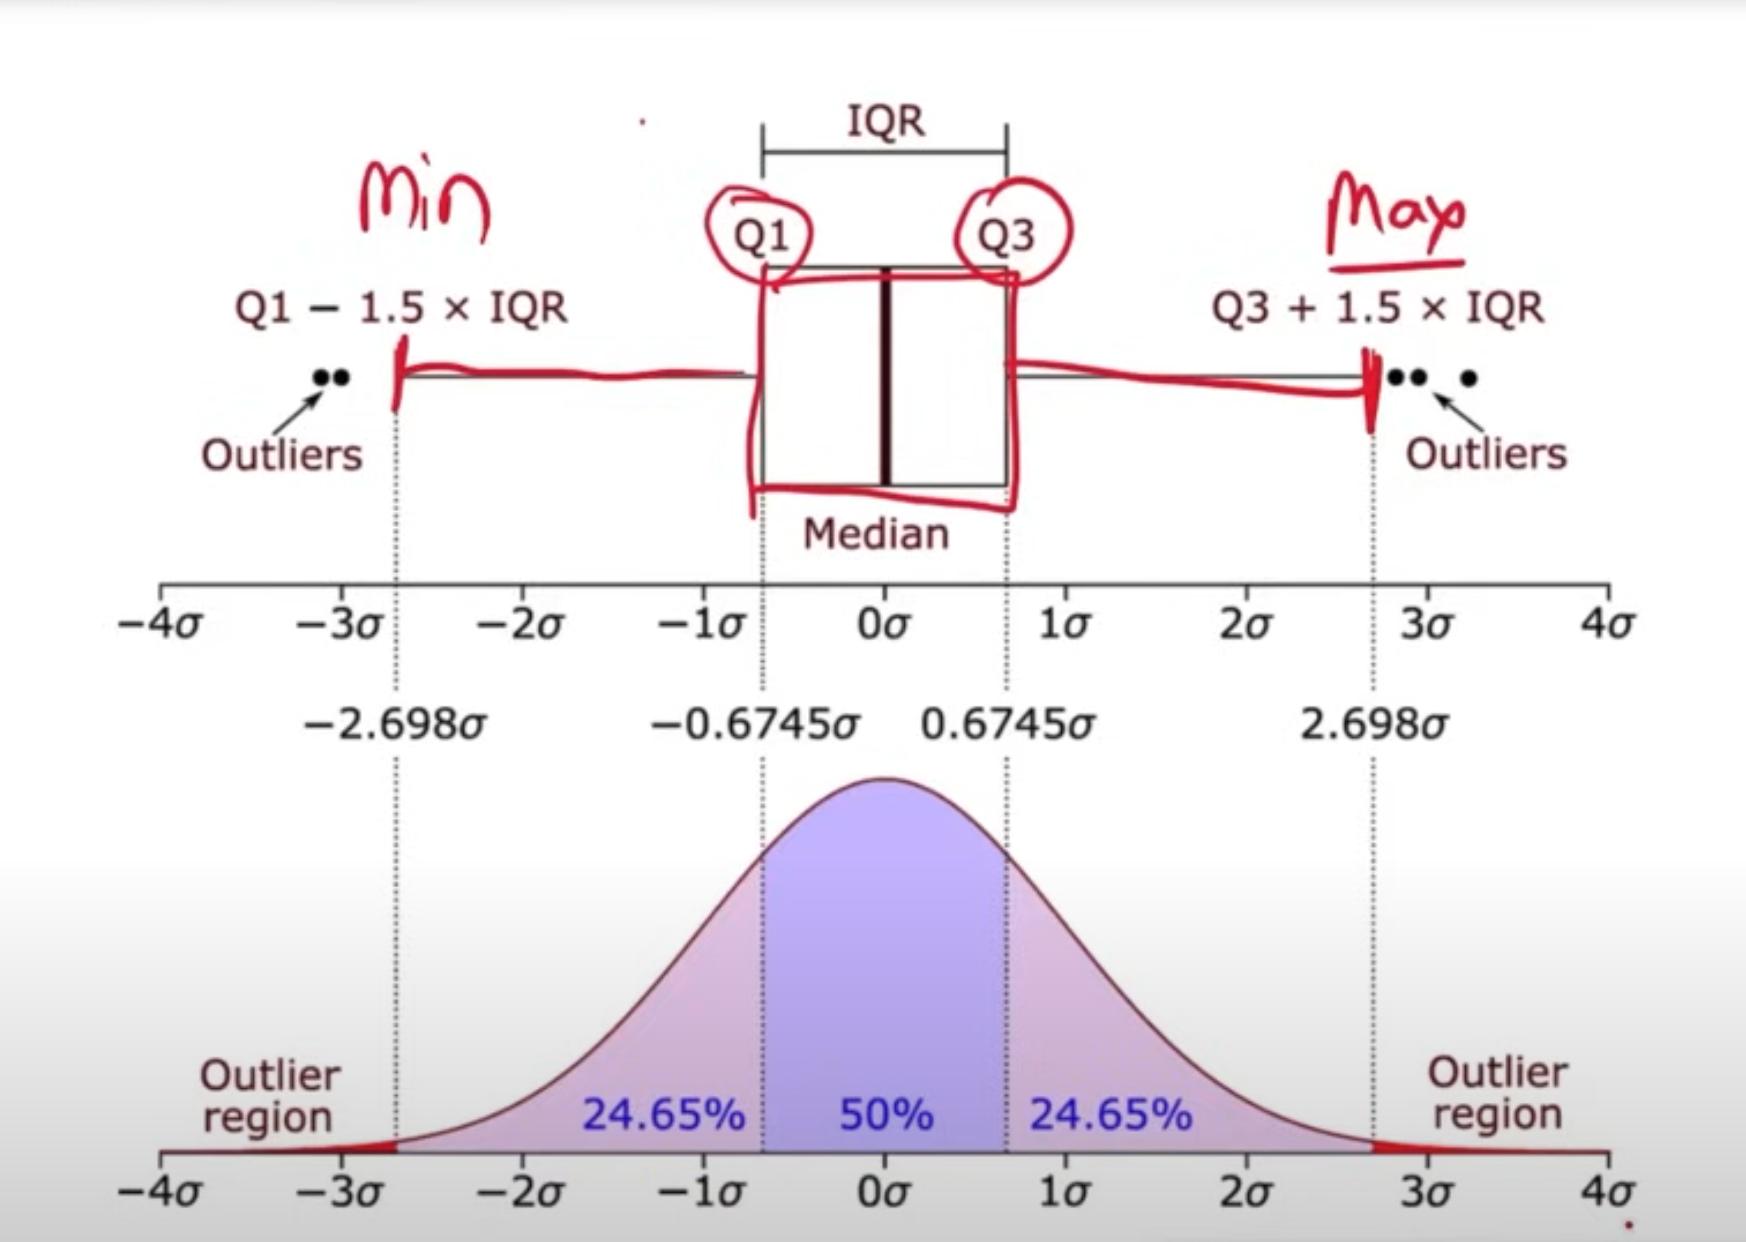

In [7]:
dataset.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Year
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,13150.354629,1.696091e+05,145475.211429,24133.860371,2014-04-28 21:36:00,7.900000,2013.750000
min,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,-40617.500000,2013-09-01 00:00:00,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,800.320000,1.592800e+04,7490.000000,2805.960000,2013-12-24 06:00:00,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,2585.250000,3.554020e+04,22506.250000,9242.200000,2014-05-16 12:00:00,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,15956.343750,2.610775e+05,245607.500000,22662.000000,2014-09-08 12:00:00,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,2014-12-01 00:00:00,12.000000,2014.000000
std,867.427859,108.602612,136.775515,2.542623e+05,22962.928775,2.367263e+05,203865.506118,42760.626563,NaN,3.377321,0.433322


In [24]:
# IQR method (its a inter quantile range)

# getting the quantiles

q1 = dataset["Units Sold"].quantile(0.25)
q3 = dataset["Units Sold"].quantile(0.75)

In [25]:
IQR = q3 - q1

In [26]:
min_range = q1 - (1.5 * IQR)
max_range = q3 + (1.5 * IQR)

min_range, max_range

(np.float64(-1081.1875), np.float64(4215.3125))

In [27]:
# now removing the outlier from the dataset and creating the new dataset without outliers

new_dataset = dataset[dataset["Units Sold"] <= max_range]
new_dataset.shape

(696, 16)

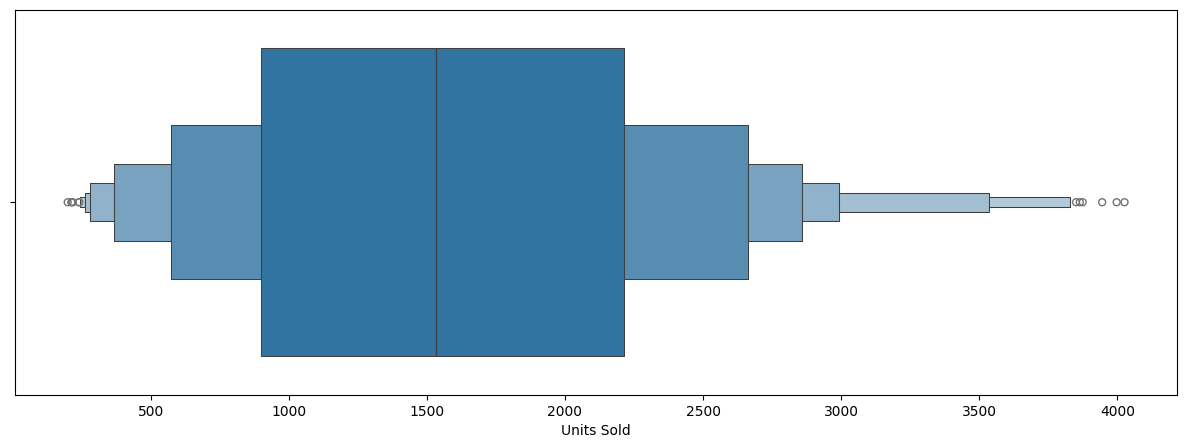

In [28]:
plt.figure(figsize=(15,5))
sns.boxenplot(x = "Units Sold", data=new_dataset)
plt.show()